In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_closed = pd.read_csv("/Users/jeongsooyoon/Desktop/DSL/24-2 EDA (경영)/서울시 상권분석서비스(점포-자치구).csv",
                        encoding = 'cp949')
df_earned = pd.read_csv("/Users/jeongsooyoon/Desktop/DSL/24-2 EDA (경영)/서울시 상권분석서비스(추정매출-자치구).csv",
                        encoding = 'cp949')

df_closed.head()

In [ ]:
df_closed.columns

In [ ]:
df_earned['서비스_업종_코드_명'].values

In [ ]:
# 매핑 딕셔너리 생성후 지정해줬던 23개 카테고리로 나눔.
mapping = {
    'PC방': '스포츠/여가',
    '가구': '소매(가구)',
    '가방': '소매(의류)',
    '가전제품': '소매(전자제품)',
    '가전제품수리': '전자제품 관련 서비스',
    '고시원': '숙박업',
    '골프연습장': '스포츠/여가',
    '네일숍': '미용',
    '노래방': '스포츠/여가',
    '당구장': '스포츠/여가',
    '문구': '소매(서적/문구)',
    '미곡판매': '소매(식품)',
    '미용실': '미용',
    '반찬가게': '소매(식품)',
    '부동산중개업': '부동산',
    '분식전문점': '식당',
    '서적': '소매(서적/문구)',
    '섬유제품': '빼기',
    '세탁소': '빼기',
    '수산물판매': '소매(식품)',
    '슈퍼마켓': '소매(생활)',
    '스포츠 강습': '교육/학원',
    '스포츠클럽': '스포츠/여가',
    '시계및귀금속': '빼기',
    '신발': '소매(의류)',
    '안경': '소매(안경)',
    '애완동물': '반려동물',
    '양식음식점': '식당',
    '여관': '숙박업',
    '예술학원': '교육/학원',
    '완구': '소매(서적/문구)',
    '외국어학원': '교육/학원',
    '운동/경기용품': '소매(스포츠)',
    '육류판매': '소매(식품)',
    '의료기기': '소매(의료)',
    '의약품': '소매(의료)',
    '인테리어': '빼기',
    '일반교습학원': '교육/학원',
    '일반의류': '소매(의류)',
    '일반의원': '필수의료',
    '일식음식점': '식당',
    '자동차미용': '차량 관련 서비스',
    '자동차수리': '차량 관련 서비스',
    '자전거 및 기타운송장비': '소매(운송)',
    '전자상거래업': '소매(전자제품)',
    '제과점': '카페 및 베이커리',
    '조명용품': '소매(가구)',
    '중식음식점': '식당',
    '철물점': '빼기',
    '청과상': '소매(식품)',
    '치과의원': '필수의료',
    '치킨전문점': '식당',
    '커피-음료': '카페 및 베이커리',
    '컴퓨터및주변장치판매': '소매(전자제품)',
    '패스트푸드점': '식당',
    '편의점': '소매(생활)',
    '피부관리실': '미용',
    '한식음식점': '식당',
    '한의원': '필수의료',
    '핸드폰': '소매(전자제품)',
    '호프-간이주점': '주점',
    '화장품': '소매(미용)',
    '화초': '빼기',
    '전자상거래업':'소매(전자제품)'
}

# 데이터프레임의 '서비스_업종_코드_명' 컬럼 값을 정리 (공백 제거 등)
df_earned['서비스_업종_코드_명'] = df_earned['서비스_업종_코드_명'].str.strip()

# 컬럼 값 변경
df_earned['서비스_업종_코드_명'] = df_earned['서비스_업종_코드_명'].map(mapping)

# 결과 확인
df_earned

In [ ]:
# '빼기' 값을 가진 행 삭제
df_earned = df_earned[df_earned['서비스_업종_코드_명'] != '빼기']

# 결과 확인
df_earned

#df_earned.to_csv('df_earned_23.csv', index=False)

len(df_earned['서비스_업종_코드_명'].unique())

In [ ]:
import pandas as pd

# 매핑 딕셔너리 생성
mapping = {
    '한식음식점': '식당',
    '중식음식점': '식당',
    '일식음식점': '식당',
    '양식음식점': '식당',
    '제과점': '카페 및 베이커리',
    '패스트푸드점': '식당',
    '치킨전문점': '식당',
    '분식전문점': '식당',
    '호프-간이주점': '주점',
    '커피-음료': '카페 및 베이커리',
    '일반교습학원': '교육/학원',
    '외국어학원': '교육/학원',
    '예술학원': '교육/학원',
    '컴퓨터학원': '교육/학원',
    '스포츠 강습': '교육/학원',
    '일반의원': '필수의료',
    '치과의원': '필수의료',
    '한의원': '필수의료',
    '동물병원': '반려동물',
    '당구장': '스포츠/여가',
    '골프연습장': '스포츠/여가',
    '볼링장': '스포츠/여가',
    'PC방': '스포츠/여가',
    '전자게임장': '스포츠/여가',
    '기타오락장': '스포츠/여가',
    '스포츠클럽': '스포츠/여가',
    '자동차수리': '차량 관련 서비스',
    '자동차미용': '차량 관련 서비스',
    '모터사이클수리': '차량 관련 서비스',
    '미용실': '미용',
    '네일숍': '미용',
    '피부관리실': '미용',
    '가전제품수리': '전자제품 관련 서비스',
    '부동산중개업': '부동산',
    '여관': '숙박업',
    '게스트하우스': '숙박업',
    '고시원': '숙박업',
    '노래방': '스포츠/여가',
    '독서실': '교육/학원',
    '슈퍼마켓': '소매(생활)',
    '편의점': '소매(생활)',
    '컴퓨터및주변장치판매': '소매(전자제품)',
    '핸드폰': '소매(전자제품)',
    '미곡판매': '소매(식품)',
    '육류판매': '소매(식품)',
    '수산물판매': '소매(식품)',
    '청과상': '소매(식품)',
    '반찬가게': '소매(식품)',
    '일반의류': '소매(의류)',
    '한복점': '소매(의류)',
    '유아의류': '소매(의류)',
    '신발': '소매(의류)',
    '가방': '소매(의류)',
    '안경': '소매(안경)',
    '의약품': '소매(의료)',
    '의료기기': '소매(의료)',
    '서적': '소매(서적/문구)',
    '문구': '소매(서적/문구)',
    '화장품': '소매(미용)',
    '미용재료': '소매(미용)',
    '운동/경기용품': '소매(스포츠)',
    '자전거 및 기타운송장비': '소매(운송)',
    '완구': '소매(서적/문구)',
    '애완동물': '반려동물',
    '중고가구': '소매(가구)',
    '가구': '소매(가구)',
    '가전제품': '소매(전자제품)',
    '조명용품': '소매(가구)',
    '자동차부품': '소매(운송)',
    '모터사이클및부품': '소매(운송)',
    '주유소': '주유소',
    '전자상거래업':'소매(전자제품)'
}

# 데이터프레임의 '서비스_업종_코드_명' 컬럼 값을 정리 (공백 제거 등)
df_closed['서비스_업종_코드_명'] = df_closed['서비스_업종_코드_명'].str.strip()

# 컬럼 값 변경
df_closed['서비스_업종_코드_명'] = df_closed['서비스_업종_코드_명'].map(mapping)

# 결과 확인
df_closed


In [ ]:
df_closed = df_closed.dropna(subset=['서비스_업종_코드_명'])
#매출 데이터에 주유소도 없기에 삭제
df_closed = df_closed[df_closed['서비스_업종_코드_명'] != '주유소']
df_closed['서비스_업종_코드_명'].unique()

In [ ]:
df_earned['서비스_업종_코드_명'].unique()

In [ ]:
df_closed[~df_closed['서비스_업종_코드_명'].isin(df_earned['서비스_업종_코드_명'])]

In [ ]:
#df_closed.to_csv('df_closed_23.csv', index=False)

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'labeledClosed.csv'
df = pd.read_csv(file_path)
df

,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,labels
0,소매(전자제품),0.138226,0.138292,0.003322,0.213894,0.004206,3
1,소매(운송),0.001234,0.001232,0.000000,0.000000,0.000000,2
2,소매(운송),0.006168,0.006295,0.001107,0.001828,0.002103,2
3,소매(가구),0.009320,0.009306,0.000000,0.007313,0.000000,2
4,소매(전자제품),0.009320,0.009306,0.000000,0.009141,0.000000,2
...,...,...,...,...,...,...,...
37265,카페 및 베이커리,0.010211,0.015533,0.023256,0.016453,0.082019,1
37266,식당,0.032004,0.035240,0.026578,0.032907,0.050473,1
37267,식당,0.017133,0.020528,0.019934,0.021938,0.052576,1
37268,식당,0.013569,0.014507,0.009967,0.025594,0.014721,1


In [4]:
# Dictionary for translating Korean to English for column names
translation_dict = {
    '서비스_업종_코드_명': 'Service_Industry_Code_Name',
    '점포_수': 'Number_of_Stores',
    '유사_업종_점포_수': 'Number_of_Similar_Industry',
    '개업_점포_수': 'Number_of_Opening',
    '폐업_점포_수': 'Number_of_Closing',
    '프랜차이즈_점포_수': 'Number_of_Franchise',
    'labels': 'Labels'
}

# Renaming the columns
df.rename(columns=translation_dict, inplace=True)

# Dictionary for translating the unique Korean service industry names to English
service_translation_dict = {
    '소매(전자제품)': 'Retail (Electronics)',
    '소매(운송)': 'Retail (Transportation)',
    '소매(가구)': 'Retail (Furniture)',
    '반려동물': 'Pet Services'
    '소매(서적/문구)': 'Retail (Books/Stationery)',
    '소매(스포츠)': 'Retail (Sports)',
    '소매(미용)': 'Retail (Beauty)',
    '소매(의료)': 'Retail (Medical)',
    '소매(안경)': 'Retail (Optics)',
    '소매(의류)': 'Retail (Clothing)',
    '소매(식품)': 'Retail (Food)',
    '소매(생활)': 'Retail (Household)',
    '교육/학원': 'Education/Academy',
    '스포츠/여가': 'Sports/Leisure',
    '숙박업': 'Lodging',
    '부동산': 'Real Estate',
    '전자제품 관련 서비스': 'Electronics Related Services',
    '미용': 'Beauty Services',
    '차량 관련 서비스': 'Vehicle Related Services',
    '필수의료': 'Essential Medical',
    '카페 및 베이커리': 'Cafe and Bakery',
    '주점': 'Pub',
    '식당': 'Restaurant'
}

# Replace the Korean service industry names with their English translations in the dataframe
df['Service_Industry_Code_Name'] = df['Service_Industry_Code_Name'].map(service_translation_dict)

# Save the updated dataframe to a new CSV file if needed
df.to_csv('translated_labeledClosed.csv', index=False)

# Display the updated dataframe
print(df.head())

  Service_Industry_Code_Name  Number_of_Stores  Number_of_Similar_Industry  \
0       Retail (Electronics)          0.138226                    0.138292   
1    Retail (Transportation)          0.001234                    0.001232   
2    Retail (Transportation)          0.006168                    0.006295   
3         Retail (Furniture)          0.009320                    0.009306   
4       Retail (Electronics)          0.009320                    0.009306   

   Number_of_Opening  Number_of_Closing  Number_of_Franchise  Labels  
0           0.003322           0.213894             0.004206       3  
1           0.000000           0.000000             0.000000       2  
2           0.001107           0.001828             0.002103       2  
3           0.000000           0.007313             0.000000       2  
4           0.000000           0.009141             0.000000       2  


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.matplotlib_fname()

'/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'

In [8]:
mpl.get_cachedir()

'/Users/jeongsooyoon/.matplotlib'

In [9]:
mpl.rcParams['font.family'] = 'NanumGothic'

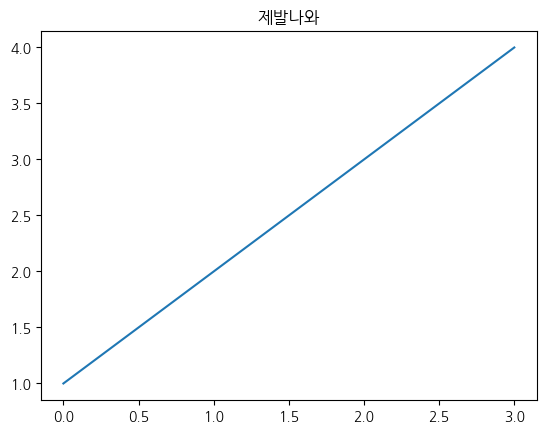

In [10]:
plt.plot([1,2,3,4])
plt.title('제발나와')
plt.show()

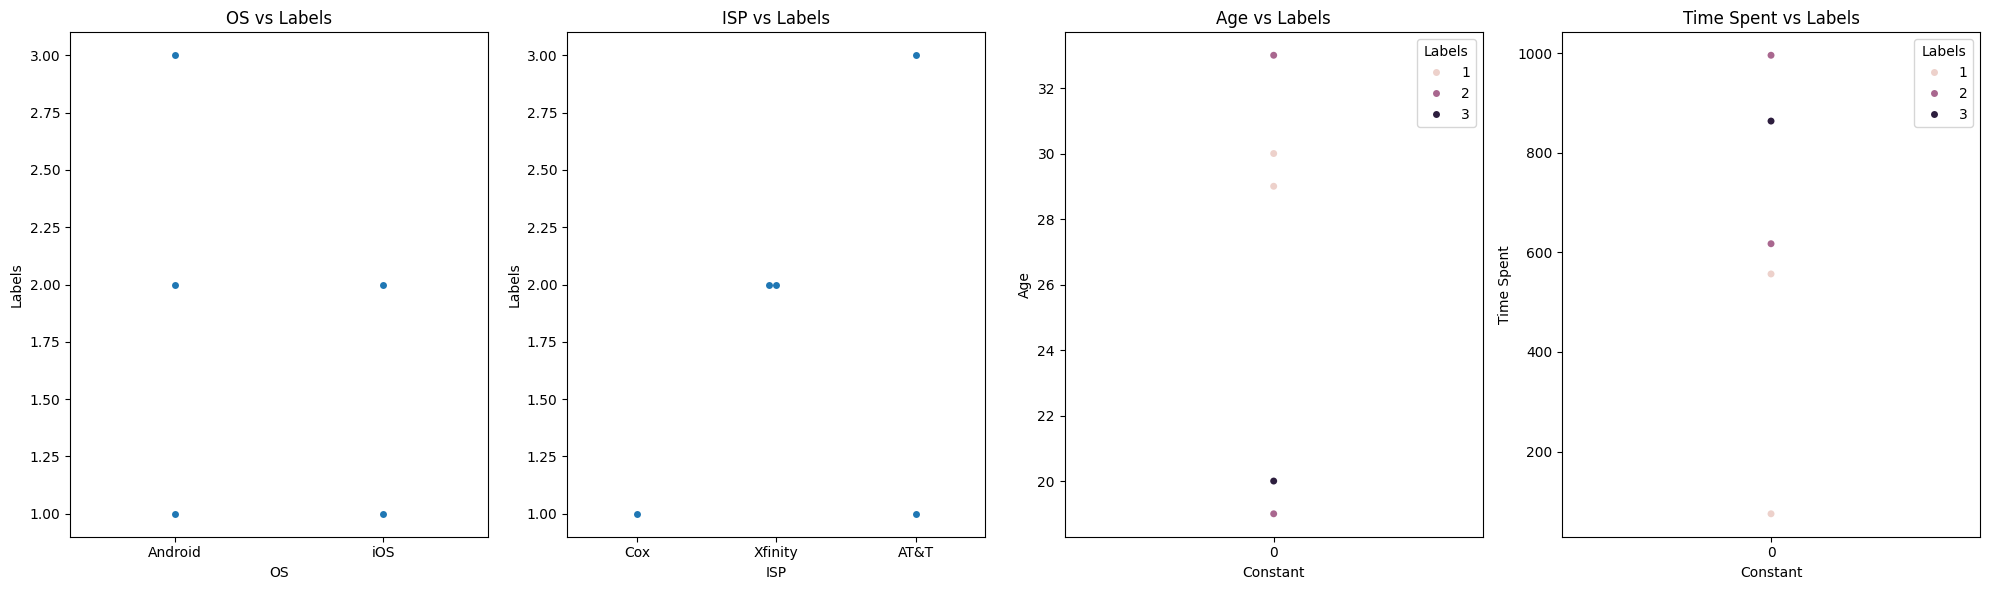

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (실제 데이터로 교체할 수 있습니다)
data = {
    'OS': ['Android', 'Android', 'Android', 'iOS', 'iOS'],
    'ISP': ['Cox', 'Xfinity', 'AT&T', 'Xfinity', 'AT&T'],
    'Age': [30, 19, 20, 33, 29],
    'Time Spent': [556.818709, 996.303312, 864.063922, 617.564914, 74.853883],
    'Labels': [1, 2, 3, 2, 1]
}

df = pd.DataFrame(data)

# 각 특성에 대해 swarmplot 생성
plt.figure(figsize=(20, 6))

# OS vs Labels
plt.subplot(1, 4, 1)
sns.swarmplot(x='OS', y='Labels', data=df)
plt.title('OS vs Labels')

# ISP vs Labels
plt.subplot(1, 4, 2)
sns.swarmplot(x='ISP', y='Labels', data=df)
plt.title('ISP vs Labels')

# Age vs Labels
plt.subplot(1, 4, 3)
sns.swarmplot(x=[0]*len(df), y='Age', hue='Labels', data=df)
plt.title('Age vs Labels')
plt.xlabel('Constant')

# Time Spent vs Labels
plt.subplot(1, 4, 4)
sns.swarmplot(x=[0]*len(df), y='Time Spent', hue='Labels', data=df)
plt.title('Time Spent vs Labels')
plt.xlabel('Constant')

plt.tight_layout()
plt.show()


In [46]:
df_closed = pd.read_csv('df_closed_23.csv')
df_closed.head()
df_closed_picked = df_closed[['서비스_업종_코드_명', '점포_수',
       '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '프랜차이즈_점포_수']]

#df_closed_picked.to_csv('df_closed_picked.csv', index=False)

In [47]:
df_closed_picked.head()

,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,소매(전자제품),2018.0,2022.0,3.0,117.0,4.0
1,소매(운송),19.0,19.0,0.0,0.0,0.0
2,소매(운송),91.0,93.0,1.0,1.0,2.0
3,소매(가구),137.0,137.0,0.0,4.0,0.0
4,소매(전자제품),137.0,137.0,0.0,5.0,0.0


In [48]:
#업종 기준으로 나머지 sum
df_grouped = df_closed_picked.groupby("서비스_업종_코드_명").sum().reset_index()
df_grouped.head()

,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,교육/학원,690742.0,741981.0,26076.0,19500.0,51239.0
1,미용,567867.0,597968.0,19412.0,13588.0,30101.0
2,반려동물,60046.0,61245.0,2624.0,1490.0,1199.0
3,부동산,700747.0,700926.0,13396.0,11443.0,179.0
4,소매(가구),262862.0,263166.0,2845.0,2703.0,304.0


In [74]:
#df_grouped.to_csv('df_grouped_sum.csv')

### 시각화

In [66]:
df_grouped_eng.columns

Index(['Service_Industry_Code_Name', 'Number_of_Stores',
       'Number_of_Similar_Industry', 'Number_of_Opening', 'Number_of_Closing',
       '프랜차이즈_점포_수'],
      dtype='object')

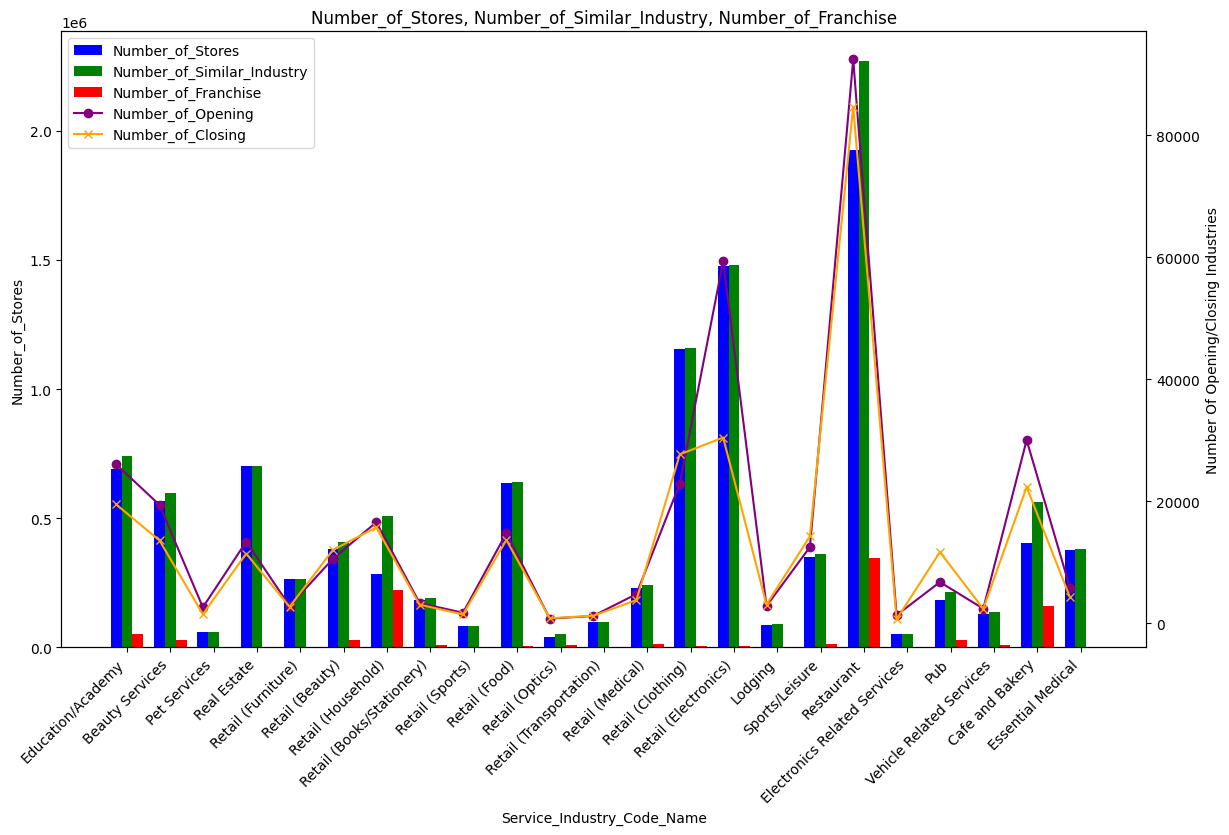

In [61]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Number_of_Stores, Number_of_Similar_Industry, Number_of_Franchise
bar_width = 0.25
index = range(len(df_grouped_eng))

bar1 = ax1.bar(index, df_grouped_eng['Number_of_Stores'], bar_width, label='Number_of_Stores', color='b')
bar2 = ax1.bar([i + bar_width for i in index], df_grouped_eng['Number_of_Similar_Industry'], bar_width, label='Number_of_Similar_Industry', color='g')
bar3 = ax1.bar([i + 2 * bar_width for i in index], df_grouped_eng['Number_of_Franchise'], bar_width, label='Number_of_Franchise', color='r')

# Adding labels
ax1.set_xlabel('Service_Industry_Code_Name')
ax1.set_ylabel('Number_of_Stores')
ax1.set_title('Number_of_Stores, Number_of_Similar_Industry, Number_of_Franchise')
ax1.set_xticks([i + bar_width for i in index])
ax1.set_xticklabels(df_grouped_eng['Service_Industry_Code_Name'], rotation=45, ha='right')

# Line plot for Number_of_Opening, Number_of_Closing
ax2 = ax1.twinx()
ax2.plot(index, df_grouped_eng['Number_of_Opening'], label='Number_of_Opening', color='purple', marker='o')
ax2.plot(index, df_grouped_eng['Number_of_Closing'], label='Number_of_Closing', color='orange', marker='x')

ax2.set_ylabel('Number Of Opening/Closing Industries')

# Combining legends
bars = [bar1, bar2, bar3]
lines = ax2.get_lines()
ax1.legend(bars + lines, [bar.get_label() for bar in bars] + [line.get_label() for line in lines], loc='upper left')

In [67]:
# Dictionary for translating Korean to English for column names
translation_dict = {
    '서비스_업종_코드_명': 'Service_Industry_Code_Name',
    '점포_수': 'Number_of_Stores',
    '유사_업종_점포_수': 'Number_of_Similar_Industry',
    '개업_점포_수': 'Number_of_Opening',
    '폐업_점포_수': 'Number_of_Closing',
    '프랜차이즈_점포_수': 'Number_of_Franchise'
}

# Renaming the columns
df_grouped_eng = df_grouped.rename(columns=translation_dict)

In [68]:
df_grouped_eng.head()

,Service_Industry_Code_Name,Number_of_Stores,Number_of_Similar_Industry,Number_of_Opening,Number_of_Closing,Number_of_Franchise
0,교육/학원,690742.0,741981.0,26076.0,19500.0,51239.0
1,미용,567867.0,597968.0,19412.0,13588.0,30101.0
2,반려동물,60046.0,61245.0,2624.0,1490.0,1199.0
3,부동산,700747.0,700926.0,13396.0,11443.0,179.0
4,소매(가구),262862.0,263166.0,2845.0,2703.0,304.0


In [69]:
# Dictionary for translating the unique Korean service industry names to English
service_translation_dict = {
    '소매(전자제품)': 'Retail (Electronics)',
    '소매(운송)': 'Retail (Transportation)',
    '소매(가구)': 'Retail (Furniture)',
    '반려동물': 'Pet Services',
    '소매(서적/문구)': 'Retail (Books/Stationery)',
    '소매(스포츠)': 'Retail (Sports)',
    '소매(미용)': 'Retail (Beauty)',
    '소매(의료)': 'Retail (Medical)',
    '소매(안경)': 'Retail (Optics)',
    '소매(의류)': 'Retail (Clothing)',
    '소매(식품)': 'Retail (Food)',
    '소매(생활)': 'Retail (Household)',
    '교육/학원': 'Education/Academy',
    '스포츠/여가': 'Sports/Leisure',
    '숙박업': 'Lodging',
    '부동산': 'Real Estate',
    '전자제품 관련 서비스': 'Electronics Related Services',
    '미용': 'Beauty Services',
    '차량 관련 서비스': 'Vehicle Related Services',
    '필수의료': 'Essential Medical',
    '카페 및 베이커리': 'Cafe and Bakery',
    '주점': 'Pub',
    '식당': 'Restaurant'
}

# Replace the Korean service industry names with their English translations in the dataframe
df_grouped_eng['Service_Industry_Code_Name'] = df_grouped_eng['Service_Industry_Code_Name'].map(service_translation_dict)

# Display the updated dataframe
print(df_grouped_eng.head())

  Service_Industry_Code_Name  Number_of_Stores  Number_of_Similar_Industry  \
0          Education/Academy          690742.0                    741981.0   
1            Beauty Services          567867.0                    597968.0   
2               Pet Services           60046.0                     61245.0   
3                Real Estate          700747.0                    700926.0   
4         Retail (Furniture)          262862.0                    263166.0   

   Number_of_Opening  Number_of_Closing  Number_of_Franchise  
0            26076.0            19500.0              51239.0  
1            19412.0            13588.0              30101.0  
2             2624.0             1490.0               1199.0  
3            13396.0            11443.0                179.0  
4             2845.0             2703.0                304.0  


In [73]:
import pandas as pd
import folium
import plotly.graph_objs as go
from plotly.offline import plot

# Plotly chart creation
trace1 = go.Bar(
    x=df_grouped_eng['Service_Industry_Code_Name'],
    y=df_grouped_eng['Number_of_Stores'],
    name='Number_of_Stores',
    marker=dict(color='blue')
)

trace2 = go.Bar(
    x=df_grouped_eng['Service_Industry_Code_Name'],
    y=df_grouped_eng['Number_of_Similar_Industry'],
    name='Number_of_Similar_Industry',
    marker=dict(color='green')
)

trace3 = go.Bar(
    x=df_grouped_eng['Service_Industry_Code_Name'],
    y=df_grouped_eng['Number_of_Franchise'],
    name='Number_of_Franchise',
    marker=dict(color='red')
)

trace4 = go.Scatter(
    x=df_grouped_eng['Service_Industry_Code_Name'],
    y=df_grouped_eng['Number_of_Opening'],
    mode='lines+markers',
    name='Number_of_Opening',
    marker=dict(color='purple')
)

trace5 = go.Scatter(
    x=df_grouped_eng['Service_Industry_Code_Name'],
    y=df_grouped_eng['Number_of_Closing'],
    mode='lines+markers',
    name='Number_of_Closing',
    marker=dict(color='orange')
)

data = [trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    barmode='group',
    title='Number of Stores, Similar Industry, Franchise, Opening, and Closing',
    xaxis=dict(title='Service Industry Code Name', tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(title='Number of Stores'),
    yaxis2=dict(title='Number of Opening/Closing', overlaying='y', side='right'),
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        font=dict(size=10)
    ),
    margin=dict(l=50, r=50, t=50, b=150),
    width=1000,
    height=600
)

fig = go.Figure(data=data, layout=layout)
fig

In [94]:
df = pd.read_csv('df_sum.csv')
df.head(3)

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,11110,종로구,CS100004,식당,21733503173,586239,15141392928,6592110245,2473306312,...,90539,62719,22943,468,516,4.7,24,3.5,18,48
1,20191,11110,종로구,CS100007,식당,3247811505,111086,2414124197,833687308,387818146,...,20359,16465,5826,49,142,4.2,6,4.9,7,93
2,20191,11110,종로구,CS200006,필수의료,14993800118,538455,13153901584,1839898534,2847348305,...,124040,115864,100169,179,179,3.9,7,3.4,6,0


In [99]:
#필요한 컬럼만 가져오기
df = df[['기준_년분기_코드','서비스_업종_코드_명','당월_매출_금액','폐업_점포_수']]
df

,기준_년분기_코드,서비스_업종_코드_명,당월_매출_금액,폐업_점포_수
0,20191,식당,21733503173,18
1,20191,식당,3247811505,7
2,20191,필수의료,14993800118,6
3,20191,소매(의료),33876865110,3
4,20191,소매(의료),9397765181,1
...,...,...,...,...
29225,20241,소매(식품),2751818273,4
29226,20241,소매(식품),21093427651,6
29227,20241,소매(의류),33713831412,27
29228,20241,반려동물,570271711,4


### 업종별 매출 금액의 분기별 평균
- "당월 매출 금액" 이라고 되어있으나, 분기별 합산값이다!

In [106]:
industry_earned_mean = df.groupby(['서비스_업종_코드_명', '기준_년분기_코드']).agg({
    '당월_매출_금액': 'mean',
    '폐업_점포_수': 'mean'
}).reset_index()
industry_earned_mean

,서비스_업종_코드_명,기준_년분기_코드,당월_매출_금액,폐업_점포_수
0,교육/학원,20191,6.961408e+09,11.730000
1,교육/학원,20192,6.838103e+09,9.600000
2,교육/학원,20193,7.511329e+09,9.000000
3,교육/학원,20194,7.280392e+09,8.620000
4,교육/학원,20201,6.231288e+09,12.010000
...,...,...,...,...
478,필수의료,20231,3.503683e+10,2.746667
479,필수의료,20232,3.522553e+10,2.453333
480,필수의료,20233,3.486816e+10,2.266667
481,필수의료,20234,3.683656e+10,2.213333


In [104]:
industry_earned_mean.to_csv('industry_earned_mean.csv', index =False)

In [108]:
len(industry_earned_mean['기준_년분기_코드'].unique())

21